In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import seaborn as sns
from scipy import signal
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm, Normalize
import random
from queue import Queue
import skimage

In [8]:
def make_sigma_table(hist):
    K = hist.shape[0]
    var_0 = np.zeros((K))
    var_1 = np.zeros((K))
    n_0 = 0
    a_0 = 0
    b_0 = 0
    for q in range(K):
        n_0 += hist[q]
        a_0 += (q*hist[q])
        b_0 += ((q**2)*hist[q])
        var_0[q] = (1/12)+(b_0-((a_0**2)/n_0))/n_0 if n_0>0 else 0
    N = n_0
    n_1 = 0
    a_1 = 0
    b_1 = 0
    q = K-2
    while q>=0:
        n_1 += hist[q+1]
        a_1 += (q+1)*hist[q+1]
        b_1 += ((q+1)**2)*hist[q+1]
        var_1[q] = (1/12)+(b_1-((a_1**2)/n_1))/n_1 if n_1>0 else 0
        q-=1
    return var_0, var_1, N

In [9]:
test_hist = np.array([1,2,3])
var_0, var_1, N = make_sigma_table(test_hist)

In [13]:
print(var_1)

[0.32333333 0.08333333 0.        ]


In [14]:
def min_error_threshold(hist):
    K = hist.shape[0]
    var_0, var_1, N = make_sigma_table(hist)
    n_0 = 0
    q_min = -1
    e_min = float('inf')
    for q in range(K-1):
        n_0 += hist[q]
        n_1 = N-n_0
        if n_0>0 and n_1>0:
            p_0 = n_0/N
            p_1 = n_1/N
            e = p_0*np.log(var_0[q]) + p_1*np.log(var_1[q]) - 2*(p_0*np.log(p_0) + p_1*np.log(p_1))
            if e < e_min:
                e_min = e
                q_min = q
                var0_ans = var_0[q]
                var1_ans = var_1[q]
    return q_min, var0_ans, var1_ans

In [22]:
img_link = r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch11\fingerprint.png"

In [23]:
img = plt.imread(img_link)

In [24]:
img = (img*255).astype(np.uint8)

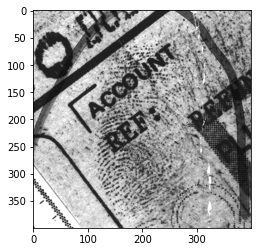

In [25]:
plt.imshow(img, cmap="gray")
plt.show()

In [26]:
img_hist = np.squeeze(cv2.calcHist([img], [0], None, [256], [0, 256]))

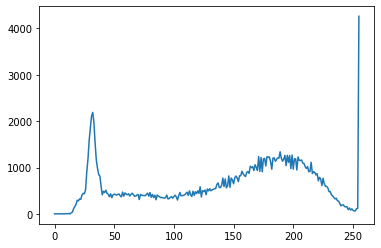

In [28]:
plt.plot(img_hist)
plt.show()

In [29]:
q_min, var_0, var_1 = min_error_threshold(img_hist)

In [32]:
print(q_min)
print(np.sqrt(var_0))
print(np.sqrt(var_1))

50
7.281090611326073
51.035991960303136


In [33]:
bin_img = np.zeros_like(img)
one_idx = np.where(img>q_min)
bin_img[one_idx[0], one_idx[1]] = 255

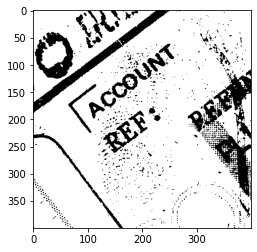

In [35]:
plt.imshow(bin_img, cmap="gray")
plt.show()